### Homework 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy import coordinates
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy import units as u

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
dir_ = "../../Notes/2020_02_04_Astropy_and_Fits/data/"
!ls $dir_

PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [3]:
ImageName = "PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits"
print(dir_+ImageName)
f = fits.open(dir_+ImageName)
data = f[0].data #This is the image array
print(data)

../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits
[[ 950.1195   828.3512   794.58575 ...  882.8172   851.57056  918.08606]
 [1314.2125  1029.75    1274.6445  ... 1307.4128  1330.3835  1520.352  ]
 [1370.7009  1161.3257  1184.0637  ... 1300.1604  1288.3566  1326.317  ]
 ...
 [1715.98    1341.2823  1293.5846  ... 1144.3986  1093.1195  1438.387  ]
 [1744.9568  1337.1195  1247.6532  ... 1150.5416  1123.4219  1512.558  ]
 [1762.8173  1284.9335  1317.8778  ... 1133.846   1113.6544  1570.3055 ]]


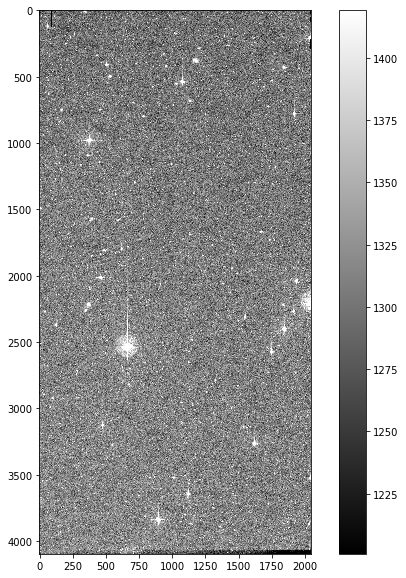

In [4]:
mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap = "gray")
plt.colorbar()

In [5]:
header = f[0].header
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

In [6]:
c = coordinates.SkyCoord(ra = 217.309490953823*u.deg, dec = 16.6581466832508*u.deg, frame='icrs')
r = 15 * u.arcminute
result_table = Gaia.cone_search_async(c,r);
a = result_table.get_results()
a

INFO: Query finished. [astroquery.utils.tap.core]


<Table masked=True length=718>
    solution_id             designation          ...          dist        
                                                 ...                      
       int64                   object            ...        float64       
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 1235408451766174976 ... 0.0078102689651942826
1635721458409799680 Gaia DR2 1235408447471375488 ...   0.01011189728276772
1635721458409799680 Gaia DR2 1235408481831117440 ...  0.013770875018669361
1635721458409799680 Gaia DR2 1235408413112751744 ...  0.014723329080051766
1635721458409799680 Gaia DR2 1235408172593463040 ...  0.015091211222991886
1635721458409799680 Gaia DR2 1235408172593462784 ...  0.017856484162542038
1635721458409799680 Gaia DR2 1235408451765922176 ...  0.021815978400433114
1635721458409799680 Gaia DR2 1235408245607793920 ...   0.02400295748293565
1635721458409799680 Gaia DR2 1235420232861644544 ...  0.026149689826570562
                ...                          ... ...                   ...
1635721458409799680 Gaia DR2 1235433396936278656 ...   0.24802779960645732
1635721458409799680 Gaia DR2 1235434870109557632 ...   0.24804224709024497
1635721458409799680 Gaia DR2 1235399479579595392 ...   0.24833656689582023
1635721458409799680 Gaia DR2 1235447724947136384 ...   0.24843594140571626
1635721458409799680 Gaia DR2 1235214692906817280 ...   0.24875594361845313
1635721458409799680 Gaia DR2 1235215448820609024 ...   0.24912992807541465
1635721458409799680 Gaia DR2 1235420030998016256 ...    0.2496154126087402
1635721458409799680 Gaia DR2 1235450950468907520 ...   0.24975037675950054
1635721458409799680 Gaia DR2 1235428204321878912 ...     0.249902094797734
1635721458409799680 Gaia DR2 1235215448821239424 ...   0.24999600127570953

In [7]:
Coord = np.array([a['ra'],a['dec']]).T
print(Coord)

[[217.3059626   16.66518682]
 [217.30111037  16.66428961]
 [217.30419857  16.67094984]
 ...
 [217.34922894  16.90498424]
 [217.23418848  16.89742289]
 [217.54138668  16.54363226]]


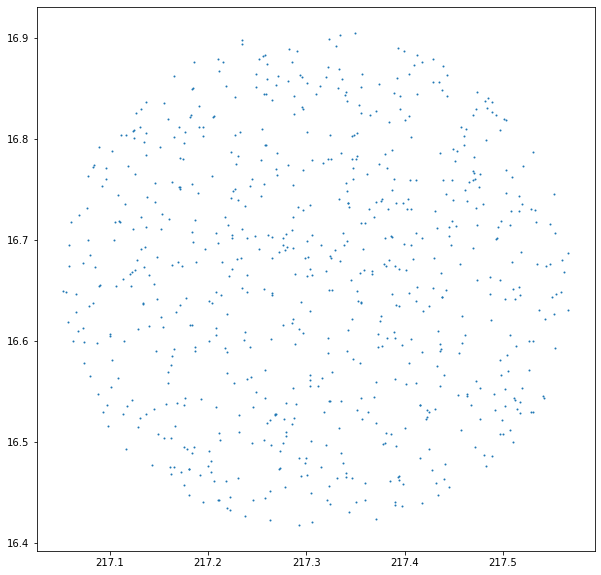

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(Coord[:,0],Coord[:,1], s=1)
plt.show()

In [9]:
w = wcs.WCS(header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [10]:
pixcoord = w.wcs_world2pix(Coord, 0)
print(pixcoord)

[[1483.98433027  583.31404285]
 [1467.42515455  586.60205066]
 [1477.83219079  562.8360864 ]
 ...
 [1626.41797316 -271.06566022]
 [1234.00668515 -241.93654819]
 [2291.50780387 1010.89491904]]


[]

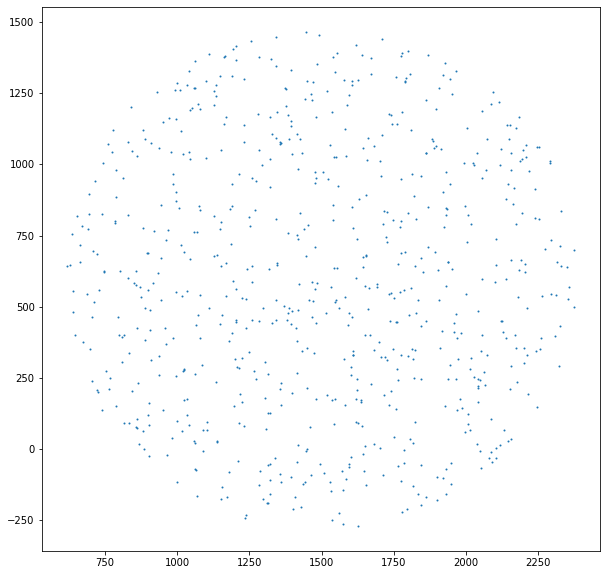

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(pixcoord[:,0],pixcoord[:,1], s=1)
plt.plot()

[]

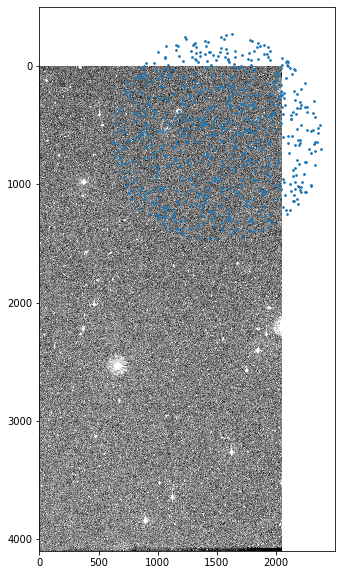

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap = "gray")
plt.scatter(pixcoord[:,0],pixcoord[:,1], s=3)
plt.plot()

In [13]:
from astropy.convolution import convolve, Box1DKernel, Box2DKernel

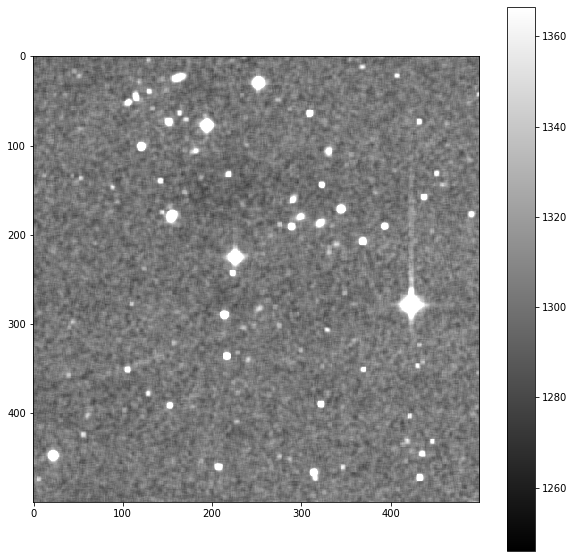

In [14]:
smoothimage = convolve(data,Box2DKernel(5))
im = np.copy(smoothimage[500:1000,1500:2000])
im2 = np.copy(data[500:1000,1500:2000])
mean2 = np.mean(im)
median2 = np.median(im)
sigma2 = np.std(im)
plt.figure(figsize = (10,10))
plt.imshow(im,vmin=median-.1*sigma2, vmax=median2+.1*sigma2, cmap = "gray")
plt.colorbar()

In [15]:
def findstars(image, nstar):
    sy, sx = image.shape
    npad = 5       
    blankval = -1
    x = np.zeros(nstar).astype('int32')
    y = np.zeros(nstar).astype('int32')
    flux = np.zeros(nstar)
    #trim edges of the image
    image[0:npad,:] = blankval
    image[:,0:npad] = blankval
    image[-npad-1:-1,:] = blankval
    image[:,-npad-1:-1] = blankval
    #loop over stars
    for i in np.arange(nstar):
        indmax = np.argmax(image)
        y[i], x[i] = np.unravel_index(indmax,image.shape)
        flux[i]=image[y[i],x[i]]
        print(i,y[i],x[i],flux[i])

        image[y[i]-npad:y[i]+npad,x[i]-npad:x[i]+npad] = blankval
    return y, x, flux

In [16]:
findstars(im, 300)

0 279 423 53433.73046875
1 226 226 31654.892578125
2 31 252 24121.68359375
3 78 194 23793.53125
4 284 423 20680.783203125
5 273 423 10968.6572265625
6 447 22 10467.1455078125
7 179 155 9222.43359375
8 172 344 4457.63916015625
9 279 428 4039.968994140625
10 290 213 3840.26953125
11 101 121 3681.29345703125
12 184 154 3093.26953125
13 279 417 2607.254638671875
14 466 314 2549.52099609375
15 191 289 2407.082763671875
16 208 369 2326.1171875
17 336 216 2153.484619140625
18 191 393 2059.370849609375
19 226 231 2004.0340576171875
20 83 194 1997.3077392578125
21 460 207 1899.423583984375
22 64 309 1867.543212890625
23 390 322 1850.4398193359375
24 231 226 1814.06005859375
25 472 432 1798.5887451171875
26 78 199 1728.84033203125
27 220 226 1721.9246826171875
28 74 152 1708.80517578125
29 392 153 1692.83447265625
30 145 323 1692.72802734375
31 284 428 1641.351318359375
32 36 251 1640.548583984375
33 225 220 1635.551513671875
34 31 257 1634.3284912109375
35 158 437 1599.9639892578125
36 243 223 

(array([279, 226,  31,  78, 284, 273, 447, 179, 172, 279, 290, 101, 184,
        279, 466, 191, 208, 336, 191, 226,  83, 460,  64, 390, 231, 472,
         78, 220,  74, 392, 145, 284,  36, 225,  31, 158, 243,  25, 284,
         46, 452, 352, 180,  52, 447,  30, 187, 273,  25,  78, 178, 289,
        446, 133,  23, 267, 273, 279, 107, 161, 351, 173, 178,  72,  73,
         40, 471, 107, 140, 278,  25, 289,  64, 432, 131, 230, 261,  22,
        106, 378, 220, 348, 307, 294, 231,  13, 172, 403, 147, 461,  36,
        184,  43, 431, 175,  71,  83, 423,  51, 283, 211, 177, 251, 340,
        145, 136, 280, 226, 189, 474, 112, 323, 403, 188, 279,  22, 273,
        220,   6, 236, 448, 447,  30, 298, 441, 283, 358, 342, 409, 289,
         83, 185, 299, 192, 242, 304, 196, 295,  40, 321,  49, 452,  79,
        285, 180,  59, 330, 214,  66,  30,  25, 301, 117, 101, 154, 109,
        499, 185,  77,  75, 154, 452,  60, 434, 319,  88,  35, 219, 100,
        301, 265, 197, 356,  82,  30,  28, 393,  38

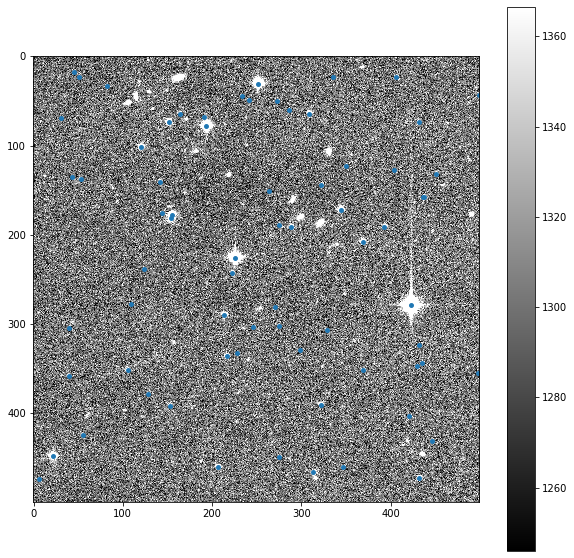

In [17]:
plt.figure(figsize = (10,10))
plt.scatter(pixcoord[:,0]-1500,pixcoord[:,1]-500, s=15)
plt.imshow(im2,vmin=median-.1*sigma2, vmax=median2+.1*sigma2, cmap = "gray")
plt.colorbar()

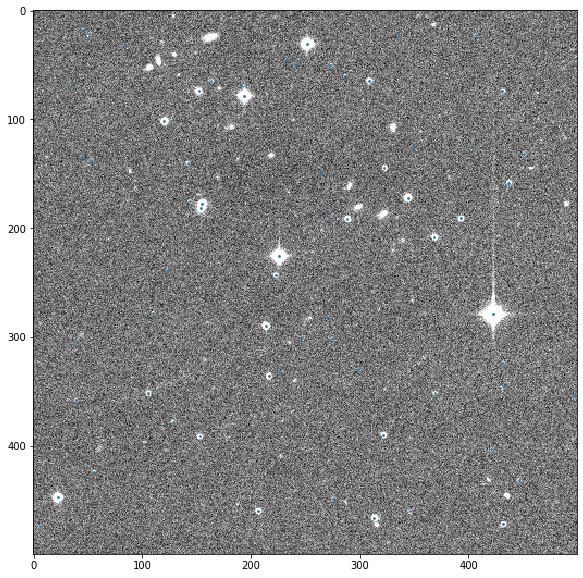

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(pixcoord[:,0]-1500,pixcoord[:,1]-500, s=3)
plt.imshow(im2, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap = "gray")


In [21]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture

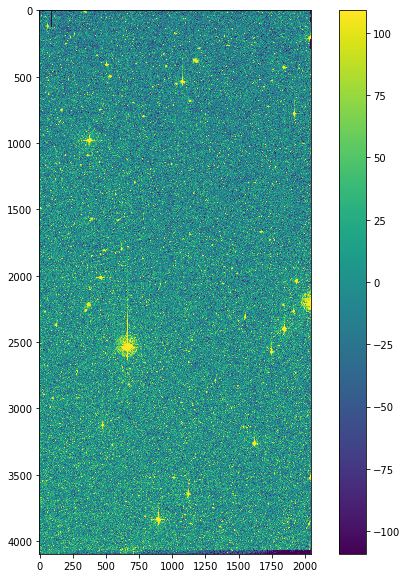

In [22]:
data -= median

plt.figure(figsize=(10,10))
plt.imshow(data, vmin=-.1*sigma,vmax=.1*sigma)
plt.colorbar()
plt.show()

In [37]:
bkg_sigma = mad_std(data)
daofind = DAOStarFinder(fwhm=2.,threshold=3.*bkg_sigma)

In [38]:
sources = daofind(data)
sources

<Table length=8670>
  id      xcentroid      ...        flux                 mag          
int64      float64       ...      float64              float64        
----- ------------------ ... ------------------ ----------------------
    1  885.4992254380717 ... 21.228458036839847    -3.3172961240852397
    2  280.1172937095493 ... 1.6551453775669849    -0.5470903637118039
    3 1448.8076724741886 ...  1.664638109511613    -0.5532995824063082
    4  175.6624891341944 ... 1.0246918701803835  -0.026483226410222074
    5  342.8621749835423 ... 1.3351496031519245   -0.31382482751587193
    6  363.1659377013564 ... 1.0269937732902887  -0.028919526145420614
    7   395.994573922586 ... 1.1148915906332286   -0.11808159922558029
    8  562.0674364067726 ...  1.236734348122779    -0.2306910568043688
    9  624.3163792407689 ...  1.006439854679301 -0.0069695658923553255
   10   686.324878926433 ...  1.271829151528532    -0.2610719380061659
  ...                ... ...                ...                    ...
 8661 1003.3218281475566 ... 1.0025120236309635  -0.002723975089068339
 8662 1540.4302373154626 ...  4.199343699304096     -1.557953553350385
 8663  1300.265462067376 ...  7.127122181559466    -2.1322855101263225
 8664  684.8175874960106 ... 1.0130773603302097  -0.014106525250965087
 8665  711.3557389278458 ... 1.1431268130545253   -0.14523602908283506
 8666 1306.0676960043884 ... 1.1352926439252744   -0.13776955968202392
 8667  431.6306778479334 ... 1.2665557179462539   -0.25656074975450943
 8668  869.3928425209996 ...  1.057365617832015   -0.06056296105745003
 8669  1538.772000831611 ... 1.0981863899140298   -0.10169014272891998
 8670  712.2407192612695 ... 1.4506554835857102    -0.4039107100346022

In [39]:
positions = np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
phot_table = aperture_photometry(data, apertures)
phot_table

<QTable length=8670>
  id       xcenter            ycenter           aperture_sum   
             pix                pix                            
int64      float64            float64             float64      
----- ------------------ ------------------ -------------------
    1  885.4992254380717 0.6863781414041987   11358.65008818875
    2  280.1172937095493  1.879571840887209 -163.10312284672835
    3 1448.8076724741886 1.2487182106076213  -39.82839874425636
    4  175.6624891341944 1.8465427173339826 -1801.3045114151507
    5  342.8621749835423 2.3525435118870677  3947.4051038159087
    6  363.1659377013564 2.3852637164047312  -2203.915014791287
    7   395.994573922586 2.3340429546053003 -2007.0744376122732
    8  562.0674364067726 2.0678989730032096 -1675.0129195221493
    9  624.3163792407689  2.071958698332113 -1360.4451797157951
  ...                ...                ...                 ...
 8661 1003.3218281475566 4088.4266553510065  -1396.722306961346
 8662 1540.4302373154626   4088.83639876516  1283.3433835921605
 8663  1300.265462067376 4089.8794172932285  1121.9449548191074
 8664  684.8175874960106  4090.615418140492 -228.31225725646112
 8665  711.3557389278458  4091.476185301255  1963.1414023284296
 8666 1306.0676960043884 4092.1619387795354   -3868.34625388971
 8667  431.6306778479334 4092.9752112194315 -1231.1667406505726
 8668  869.3928425209996 4092.1476196163994  -2258.166753527934
 8669  1538.772000831611  4091.835855090317 -400.90123138399224
 8670  712.2407192612695  4094.232705581531  1474.0657830744506

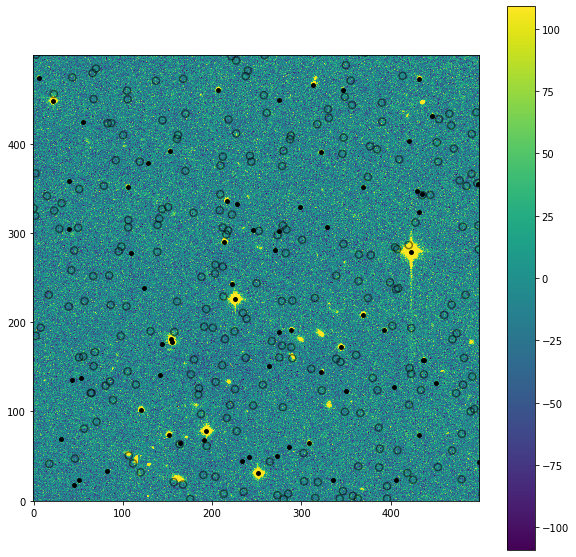

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(pixcoord[:,0]-1500,pixcoord[:,1]-500, s=15, color = 'black')
plt.imshow(data[500:1000,1500:2000], origin = 'lower', vmin=-.1*sigma,vmax=.1*sigma)
plt.colorbar()
apertures.plot(color='black', lw=1.5, alpha=0.5)